# 1. Regression

### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
np.random.seed(0)
%matplotlib inline

## Reading data

In [4]:
dataset = pd.read_csv('AB_NYC_2019.csv')

In [5]:
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

# Data Exploration

In [7]:
# Checking no. of rows and column in data set
dataset.shape

(48895, 16)

In [8]:
dataset.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
#Checking no. of null values in data set
dataset.isnull().sum().sort_values(ascending = True)

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
name                                 16
host_name                            21
last_review                       10052
reviews_per_month                 10052
dtype: int64

In [10]:
dataset.fillna({'reviews_per_month':0}, inplace=True)

In [11]:
#Checking unique values of neighbourhood group
dataset.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [12]:
#Checking unique values of neighbourhood
dataset.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [13]:
#Checking unique values of room types
dataset.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [14]:
# Null values for name and host_name I replace with 0. Also reviews_per_month I replace with 0
# Replacing null Values for name,host_name, reviews_per_month

dataset['name'].fillna(value=0, inplace=True)
#dataset['host_name'].fillna(value=0, inplace=True)
dataset['reviews_per_month'].fillna(value=0, inplace=True)

In [15]:
dataset.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [16]:
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [17]:
#rooms with max reviews
rooms_set = dataset.sort_values(by=['number_of_reviews'],ascending=False).head(1000)
#rooms_set

In [18]:
# host with highest listing
host_list = dataset.host_id.value_counts().head(10)
host_list

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

[Text(0, 0, '219517861'),
 Text(0, 0, '107434423'),
 Text(0, 0, '30283594'),
 Text(0, 0, '137358866'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '61391963'),
 Text(0, 0, '22541573'),
 Text(0, 0, '200380610'),
 Text(0, 0, '7503643')]

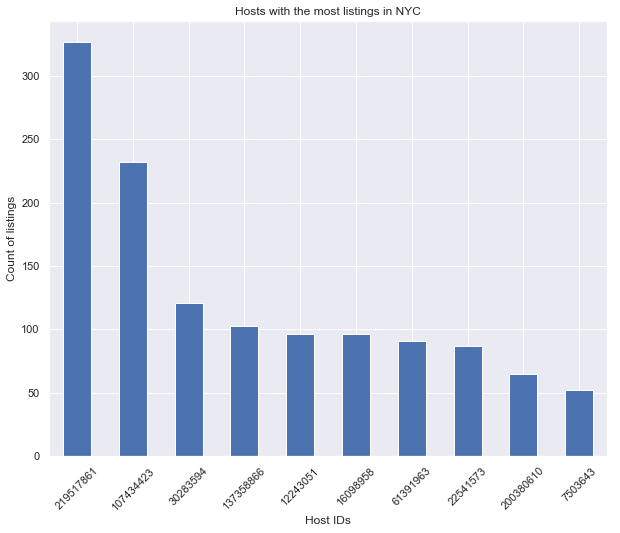

In [19]:
sns.set(rc={'figure.figsize':(10,8)})
viz_1=host_list.plot(kind='bar')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

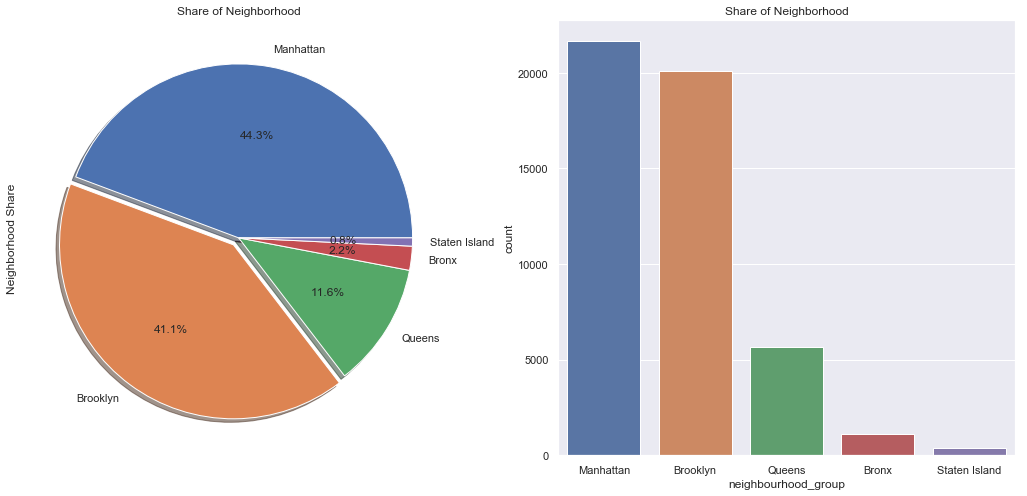

In [20]:
# Host location by neighbourhoodgroup
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['neighbourhood_group'].value_counts().plot.pie(explode=[0,0.05,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Neighborhood')
ax[0].set_ylabel('Neighborhood Share')
sns.countplot('neighbourhood_group',data=dataset,ax=ax[1],order=dataset['neighbourhood_group'].value_counts().index)
ax[1].set_title('Share of Neighborhood')
plt.show()

[Text(0, 0, 'Bronx'),
 Text(0, 0, 'Brooklyn'),
 Text(0, 0, 'Manhattan'),
 Text(0, 0, 'Queens'),
 Text(0, 0, 'Staten Island')]

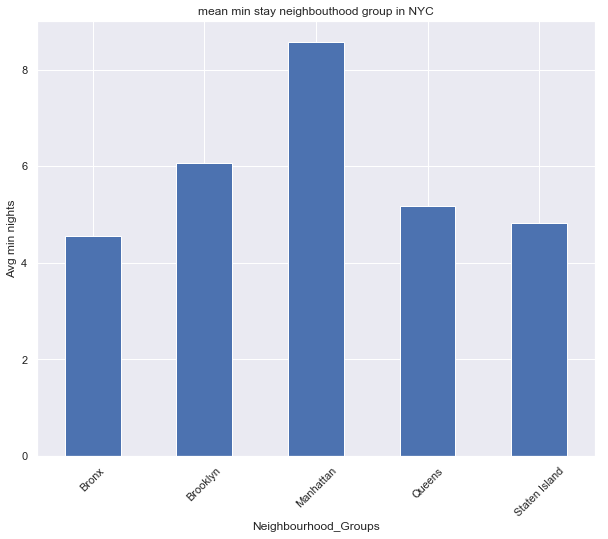

In [21]:
sns.set(rc={'figure.figsize':(10,8)})
viz_1=dataset.groupby('neighbourhood_group')['minimum_nights'].mean().plot(kind='bar')
viz_1.set_title('mean min stay neighbouthood group in NYC')
viz_1.set_ylabel('Avg min nights')
viz_1.set_xlabel('Neighbourhood_Groups')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

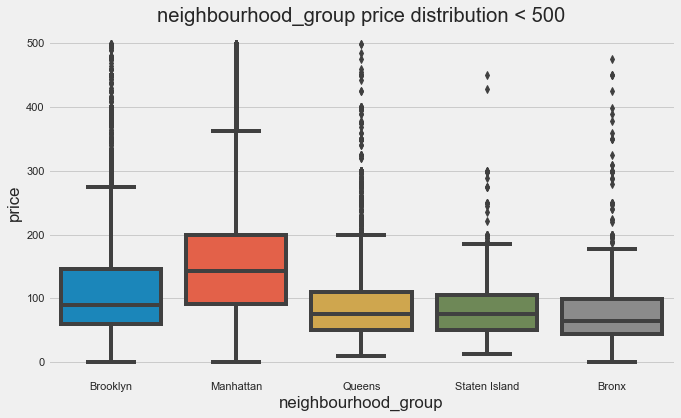

In [22]:

plt.style.use('fivethirtyeight')
ng = dataset[dataset.price <500]
plt.figure(figsize=(10,6))
sns.boxplot(y="price",x ='neighbourhood_group' ,data = ng)
plt.title("neighbourhood_group price distribution < 500")
plt.show()

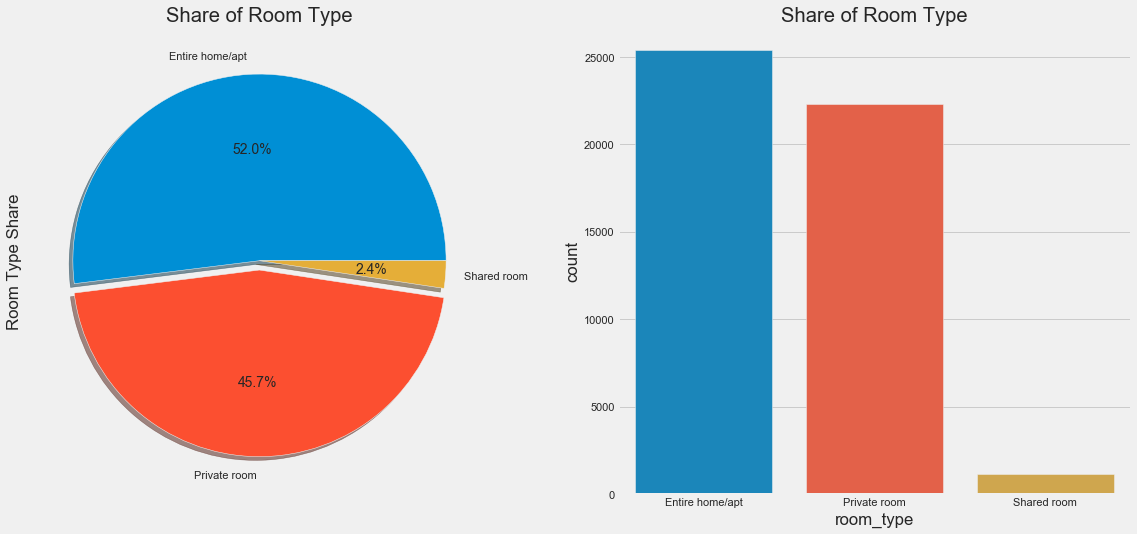

In [23]:
#distribution of room types
plt.style.use('fivethirtyeight')
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['room_type'].value_counts().plot.pie(explode=[0,0.05,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Room Type')
ax[0].set_ylabel('Room Type Share')
sns.countplot('room_type',data=dataset,ax=ax[1],order=dataset['room_type'].value_counts().index)
ax[1].set_title('Share of Room Type')
plt.show()

[Text(0, 0, '(Bronx, Entire home/apt)'),
 Text(0, 0, '(Bronx, Private room)'),
 Text(0, 0, '(Bronx, Shared room)'),
 Text(0, 0, '(Brooklyn, Entire home/apt)'),
 Text(0, 0, '(Brooklyn, Private room)'),
 Text(0, 0, '(Brooklyn, Shared room)'),
 Text(0, 0, '(Manhattan, Entire home/apt)'),
 Text(0, 0, '(Manhattan, Private room)'),
 Text(0, 0, '(Manhattan, Shared room)'),
 Text(0, 0, '(Queens, Entire home/apt)'),
 Text(0, 0, '(Queens, Private room)'),
 Text(0, 0, '(Queens, Shared room)'),
 Text(0, 0, '(Staten Island, Entire home/apt)'),
 Text(0, 0, '(Staten Island, Private room)'),
 Text(0, 0, '(Staten Island, Shared room)')]

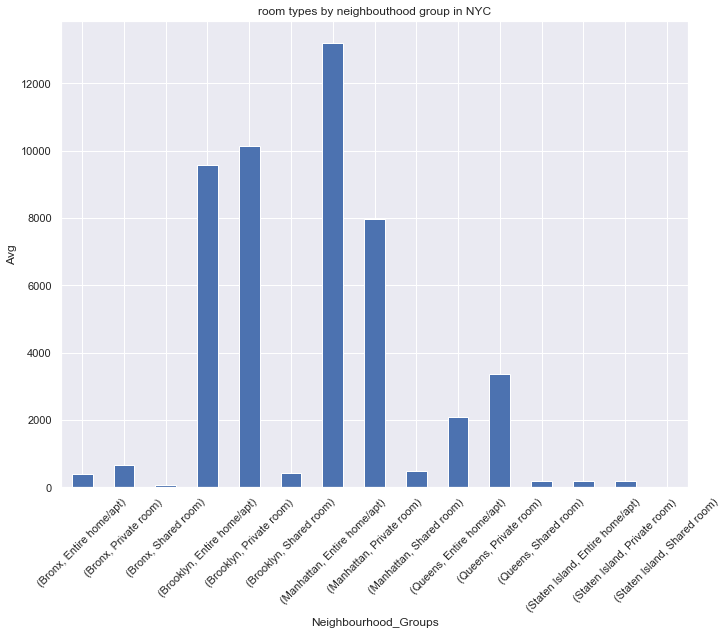

In [24]:
#show it area wise

sns.set(rc={'figure.figsize':(10,8)})
viz_1=dataset.groupby(['neighbourhood_group','room_type'])['room_type'].count().plot(kind='bar')
viz_1.set_title('room types by neighbouthood group in NYC')
viz_1.set_ylabel('Avg')
viz_1.set_xlabel('Neighbourhood_Groups')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [25]:
# rooms with max reviews
df1=dataset.sort_values(by=['number_of_reviews'],ascending=False).head(1000)
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,7/5/2019,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,6/21/2019,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,6/23/2019,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,6/15/2019,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,6/27/2019,13.40,2,173


In [26]:
# Top neighbourhood_group
host_neigh = dataset.neighbourhood_group.value_counts().head(3)
host_neigh

Manhattan    21661
Brooklyn     20104
Queens        5666
Name: neighbourhood_group, dtype: int64

In [27]:
# average price and availability in year 
average_price_ava = pd.DataFrame(dataset[['price', 'availability_365']].describe())
average_price_ava.columns=['Price', 'Availability in a year']
average_price_ava

,Price,Availability in a year
count,48895.000000,48895.000000
mean,152.720687,112.781327
std,240.154170,131.622289
min,0.000000,0.000000
25%,69.000000,0.000000
50%,106.000000,45.000000
75%,175.000000,227.000000
max,10000.000000,365.000000


In [28]:
# Most reviewed hosts per month

gr = pd.DataFrame(dataset.groupby('reviews_per_month').sum()['host_id'])
rev = (gr.sort_values('reviews_per_month',ascending=False)).head(3)
rev.columns = ['Host ID']
rev['Reviews per month'] = rev.index
rev.reset_index(drop=True, inplace=True)
rev

,Host ID,Reviews per month
0,244361589,58.50
1,244361589,27.95
2,228415932,20.94


# Pre Processing Data

In [29]:
colList = ['neighbourhood_group', 'room_type', 'price', 'minimum_nights', 'number_of_reviews']
df = pd.read_csv('AB_NYC_2019.csv',  usecols=colList)
df.columns

Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews'],
      dtype='object')

In [30]:
df['price_log'] = np.log(df.price+1)
df.columns

Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'price_log'],
      dtype='object')

Text(0.5, 1.0, 'Price Distribution Plot')

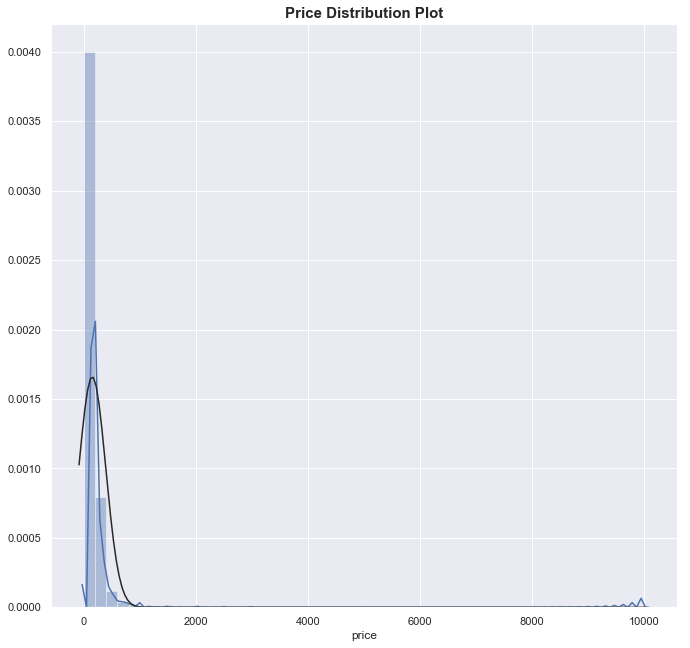

In [31]:
#price distribution plot
plt.figure(figsize=(10,10))
sns.distplot(dataset['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

Text(0.5, 1.0, 'Log-Price Distribution Plot')

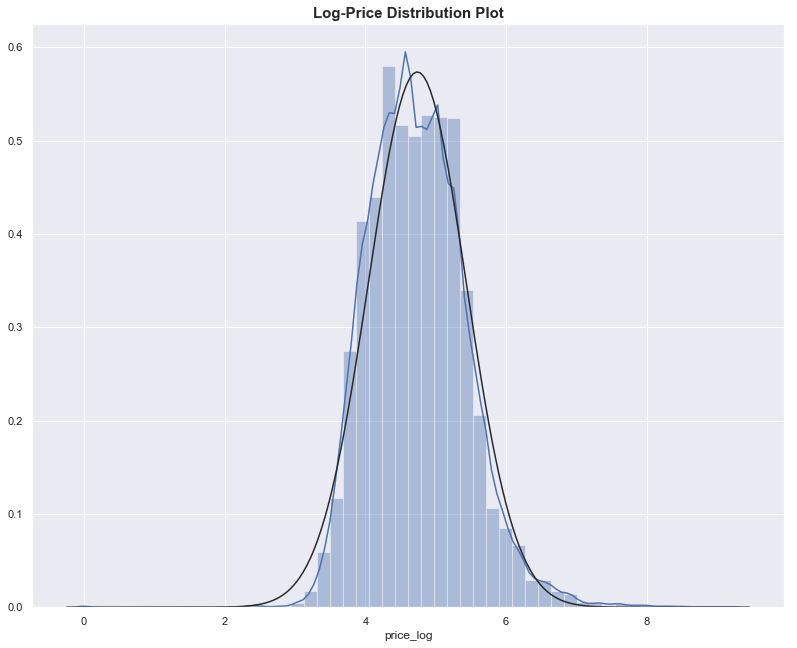

In [32]:
plt.figure(figsize=(12,10))
sns.distplot(df['price_log'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

# Dataset

In [33]:
from sklearn.model_selection import train_test_split
X = df.drop(['price','price_log'], axis = 1)
y = df['price_log']

#seprating out categorical features
categorical_features = X.select_dtypes(include=['object'])
categorical_features_one_hot = pd.get_dummies(categorical_features)

#separating out numerical features
numerical_features =  X.select_dtypes(exclude=['object'])

#combining data
X_df = pd.concat([numerical_features, categorical_features_one_hot], axis=1)

#splitting training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# Regressor

In [32]:
from sklearn.preprocessing import scale, StandardScaler, RobustScaler, OneHotEncoder
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# KNN Regressor

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

params = {'n_neighbors':[10,12,14,16]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 16}

Text(0, 0.5, 'Score')

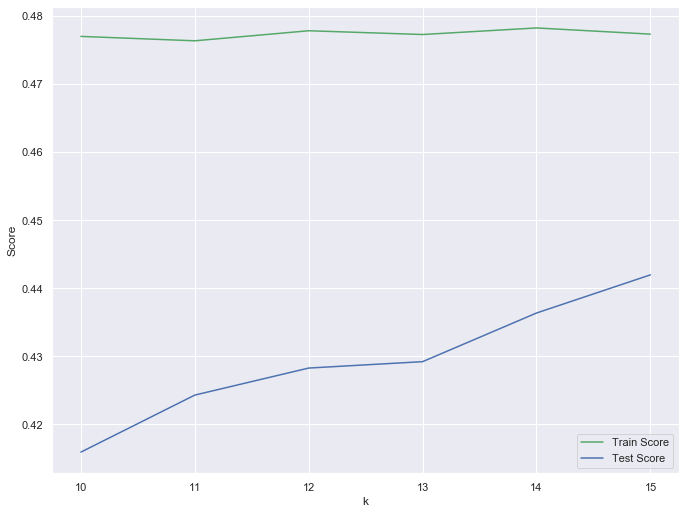

In [34]:
knn_reg_train_score = []
knn_reg_test_score = []

for k in range(10,16):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    knn_reg_train_score.append(knn_reg.score(X_train, y_train))
    knn_reg_test_score.append(knn_reg.score(X_test, y_test))


x_axis = range(10,16)
plt.plot(x_axis, knn_reg_train_score, c = 'g', label = 'Train Score')
plt.plot(x_axis, knn_reg_test_score, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('Score')

In [35]:
knn_reg = KNeighborsRegressor(model.best_params_['n_neighbors'])
knn_reg.fit(X_train, y_train)
knn_train_score = knn_reg.score(X_train, y_train)
knn_test_score = knn_reg.score(X_test, y_test)

print("KNN Train Regressor score: ", knn_train_score)
print("KNN Test Regressor score: ", knn_test_score)

KNN Train Regressor score:  0.47780264226781016
KNN Test Regressor score:  0.4425996482807223


In [67]:
report_table_1 = ['knn', 'n_neighbors = 16', knn_train_score, knn_test_score]

# Linear Regressor

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print("Training R^2:", lreg.score(X_train, y_train))
print("Testing R^2:", lreg.score(X_test, y_test))

Score = cross_val_score(lreg, X_train, y_train)
print("Cross Validation Scores:", Score)

Training R^2: 0.4489990433479306
Testing R^2: -6.290569134551387e+21
Cross Validation Scores: [0.45022445 0.45234524 0.44303862]


C:\Users\shank\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [38]:
report_table_2 = ['Linear Regression', 'Simple', lreg.score(X_train, y_train), lreg.score(X_test, y_test)]

# Polynomial Regressor

In [39]:
from  sklearn.preprocessing  import PolynomialFeatures

poly = PolynomialFeatures(5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg.fit(X_train_poly, y_train)
poly_train_score = (lreg.score(X_train_poly, y_train))
poly_test_score = (lreg.score(X_test_poly, y_test))
    
print(poly_train_score)
print(poly_test_score)

0.46552877802060744
-1869709026071.763


In [40]:
report_table_3 = ['Polynomial Regression', 'Order = 5', poly_train_score, poly_test_score]

# Ridge Regressor

In [41]:
from  sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

In [42]:
print ("Test Score:",test_score_list)
print ("Train Score:",train_score_list)

Test Score: [0.46333404845543685, 0.46333403879720464, 0.46333394214453033, 0.46333296857876094, 0.46332253116838706]
Train Score: [0.44901197858396, 0.4490119785831715, 0.44901197850432384, 0.4490119706217205, 0.4490111845375843]


Text(0.5, 0, '$\\alpha$')

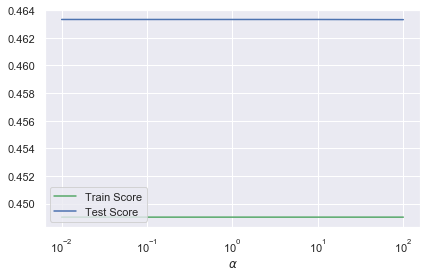

In [43]:
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [44]:
ridge = Ridge(alpha = 100)    
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.4490
Test score: 0.4633


In [45]:
report_table_4 = ['Ridge Regression', 'Alpha = 100', ridge.score(X_train, y_train), ridge.score(X_test, y_test)]

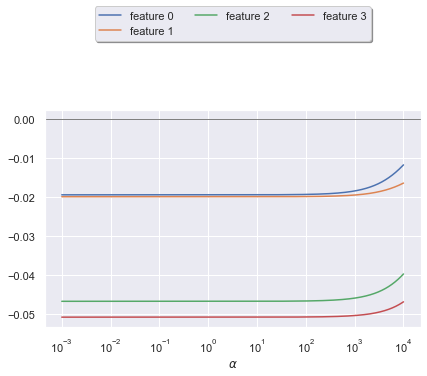

In [46]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,len(X.columns)):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# Lasso Regressor

In [47]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha, max_iter = 10000)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

In [48]:
print ("Train Score:",train_score_list)
print ("Test Score:",test_score_list)

Train Score: [0.4475668690779862, 0.4017129508361944, 0.0, 0.0]
Test Score: [0.46195002088766435, 0.415028121215107, -0.0003789789921835318, -0.0003789789921835318]


Text(0.5, 0, '$\\alpha$')

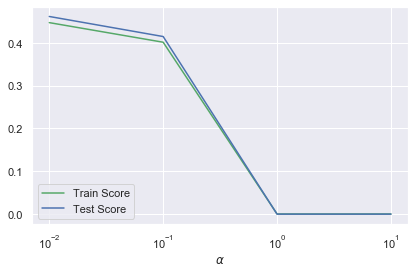

In [49]:
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$') 

In [50]:
lasso = Lasso(alpha = 0.01, max_iter=10000)
lasso.fit(X_train,y_train)

lasso_train_score = lasso.score(X_train,y_train)
lasso_test_score = lasso.score(X_test,y_test)

print('Train score:',lasso_train_score)
print('Test score:',lasso_test_score)

Train score: 0.4475668690779862
Test score: 0.46195002088766435


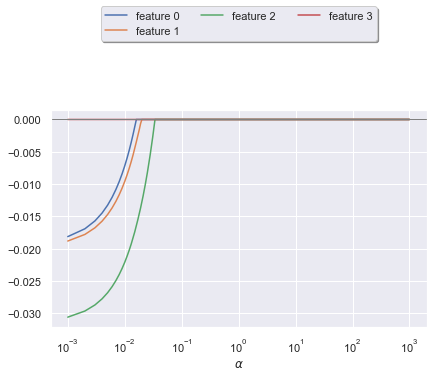

In [51]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,len(X.columns)):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [52]:
report_table_5 = ['Lasso Regression', 'Alpha = 0.01', lasso_train_score,lasso_test_score]

# SVM 

from sklearn import svm
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf'), 'gamma': [0.01, 0.1, 1 , 10],'epsilon':[0.1,0.2,0.5,0.3], 'C':[0.1, 1, 10, 100]}
svr = svm.SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(X_train, y_train)
print(clf.best_params_)

clf = svm.SVR(kernel='linear', gamma=0.01, epsilon=0.2, C = 1)
clf.fit(X_train, y_train)
svr_train_score = clf.score(X_train, y_train)
svr_test_score = clf.score(X_test, y_test)
print(svr_train_score, svr_test_score)

report_table_6 = ['Support Vector Regression', 'Linear Kernel, gamma = 0.01, epsilon = 0.2', svr_train_score, svr_test_score]

# Generating Report

In [61]:
report_table = pd.DataFrame(list(zip(report_table_1,
             report_table_2,
             report_table_3,
             report_table_4,
             report_table_5))).transpose()
             #report_table_6,
             #report_table_7)))

In [58]:
report_table.columns = ['Model', 'Model Parameter', 'Train Score', 'Test Score']

In [59]:
report_table

,Model,Model Parameter,Train Score,Test Score
0,knn,n_neighbors = 16,0.477803,0.4426
1,Linear Regression,Simple,0.448999,-6.29057e+21
2,Polynomial Regression,Order = 5,0.465529,-1.86971e+12
3,Ridge Regression,Alpha = 100,0.449011,0.463323
4,Lasso Regression,Alpha = 0.01,0.447567,0.46195


In [60]:
%whos

Variable                       Type                   Data/Info
---------------------------------------------------------------
GridSearchCV                   ABCMeta                <class 'sklearn.model_sel<...>on._search.GridSearchCV'>
KNeighborsRegressor            ABCMeta                <class 'sklearn.neighbors<...>ion.KNeighborsRegressor'>
Lasso                          ABCMeta                <class 'sklearn.linear_mo<...>oordinate_descent.Lasso'>
LinearRegression               ABCMeta                <class 'sklearn.linear_mo<...>l.base.LinearRegression'>
OneHotEncoder                  type                   <class 'sklearn.preproces<...>_encoders.OneHotEncoder'>
PolynomialFeatures             type                   <class 'sklearn.preproces<...>data.PolynomialFeatures'>
Ridge                          ABCMeta                <class 'sklearn.linear_model.ridge.Ridge'>
RobustScaler                   type                   <class 'sklearn.preprocessing.data.RobustScaler'>
Score      

In [62]:
report_table

,0,1,2,3
0,knn,n_neighbors = 16,0.477803,0.4426
1,Linear Regression,Simple,0.448999,-6.29057e+21
2,Polynomial Regression,Order = 5,0.465529,-1.86971e+12
3,Ridge Regression,Alpha = 100,0.449011,0.463323
4,Lasso Regression,Alpha = 0.01,0.447567,0.46195


In [68]:
report_table.columns = ['Model Name', 'Model Parameter', 'Training Score', 'Testing Score']
report_table.index = report_table['Model Name']

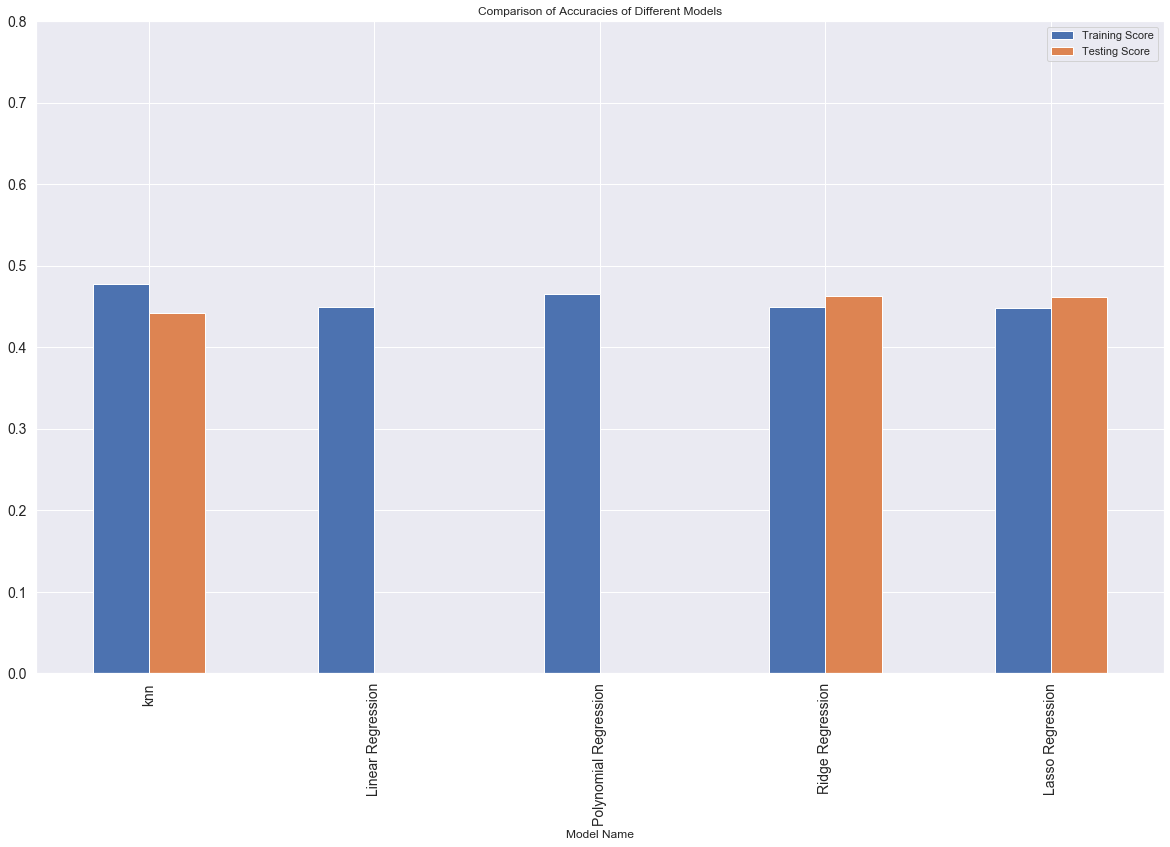

In [76]:
ax = report_table[['Training Score','Testing Score']].plot(kind='bar',
            title = "Comparison of Accuracies of Different Models", figsize=(18, 12), fontsize = 14)
plt.ylim((0,0.8))
plt.show()

# Model Selection

### Ridge and Lasso are very close to each other and seems the best fit model

### Ridge Regressor

In [34]:
from  sklearn.linear_model import Ridge

ridge = Ridge(alpha=100)
ridge.fit(X_train,y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [36]:
print("Ridge Regression Training Score:", ridge.score(X_train, y_train))
print("Ridge Regression Testing Score:", ridge.score(X_test, y_test))

Ridge Regression Training Score: 0.44883027390243535
Ridge Regression Testing Score: 0.46343679686069134


In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt

y_predicted = ridge.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_predicted))

print("Ridge Regression Root Mean Squared Error (RMSE):", rmse)

Ridge Regression Root Mean Squared Error (RMSE): 0.5038267955835457


In [39]:
print("Predicted value for 10th testing row: ", y_predicted[9])
print("Original value for 10th testing row: ", y_test.values[9])
print("")
print("Predicted value for 100th testing row: ", y_predicted[99])
print("Original value for 100th testing row: ", y_test.values[99])

Predicted value for 10th testing row:  4.790574278684325
Original value for 10th testing row:  4.31748811353631

Predicted value for 100th testing row:  4.898713767645002
Original value for 100th testing row:  5.19295685089021


**According to this model, RMSE of 0.50 was achieved.
While the train and test scores were calculated using Linear Kernelized SVM Regression as 0.44 and 0.46 respectively.**

### Lasso Regressor

In [41]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01, max_iter=10000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [42]:
print("Lasso Regression Training Score:", lasso.score(X_train, y_train))
print("Lasso Regression Testing Score:", lasso.score(X_test, y_test))

Lasso Regression Training Score: 0.43740993922483196
Lasso Regression Testing Score: 0.45339998374976853


In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt

y_predicted = lasso.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_predicted))

print("Lasso Regression Root Mean Squared Error (RMSE):", rmse)

Lasso Regression Root Mean Squared Error (RMSE): 0.5085171900324955


In [48]:
print("Predicted value for 10th testing row: ", y_predicted[9])
print("Original value for 10th testing row: ", y_test.values[9])
print("")
print("Predicted value for 100th testing row: ", y_predicted[99])
print("Original value for 100th testing row: ", y_test.values[99])

Predicted value for 10th testing row:  4.961364292851058
Original value for 10th testing row:  4.31748811353631

Predicted value for 100th testing row:  4.968376911378665
Original value for 100th testing row:  5.19295685089021


**According to this model, RMSE of 0.50 was achieved.
While the train and test scores were calculated using Linear Kernelized SVM Regression as 0.43 and 0.45 respectively.**

# 2. Classification

# Data Set Description

Please find the dataset description here - [https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)]

### Loading libraries and Data

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

import pandas as pd
import numpy as np

# importing ploting libraries
import matplotlib.pyplot as plt   
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns

In [4]:
file = 'german.data'

names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']

german_credit = pd.read_csv(file,names = names, delimiter=' ')
print(german_credit.shape)
print (german_credit.columns)
german_credit.head(10)

(1000, 21)
Index(['existingchecking', 'duration', 'credithistory', 'purpose',
       'creditamount', 'savings', 'employmentsince', 'installmentrate',
       'statussex', 'otherdebtors', 'residencesince', 'property', 'age',
       'otherinstallmentplans', 'housing', 'existingcredits', 'job',
       'peopleliable', 'telephone', 'foreignworker', 'classification'],
      dtype='object')


,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


In [5]:
german_credit.isna().sum()

existingchecking         0
duration                 0
credithistory            0
purpose                  0
creditamount             0
savings                  0
employmentsince          0
installmentrate          0
statussex                0
otherdebtors             0
residencesince           0
property                 0
age                      0
otherinstallmentplans    0
housing                  0
existingcredits          0
job                      0
peopleliable             0
telephone                0
foreignworker            0
classification           0
dtype: int64

In [6]:
# Binarize the y output for easier use
german_credit.classification.replace([1,2], [1,0], inplace=True)
# Print number of 'good' credits (should be 700) and 'bad credits (should be 300)
german_credit.classification.value_counts()

1    700
0    300
Name: classification, dtype: int64

In [7]:
#numerical variables labels
numvar = ['creditamount', 'duration', 'installmentrate', 'residencesince', 'age', 
           'existingcredits', 'peopleliable', 'classification']

# Standardization
numdata_std = pd.DataFrame(StandardScaler().fit_transform(german_credit[numvar].drop(['classification'], axis=1)))

# Encoding Categorical Feature

In [8]:
#Labelencoding to transform categorical to numerical, Enables better Visualization than one hot encoding

from collections import defaultdict

#categorical variables labels
catvar = ['existingchecking', 'credithistory', 'purpose', 'savings', 'employmentsince',
           'statussex', 'otherdebtors', 'property', 'otherinstallmentplans', 'housing', 'job', 
           'telephone', 'foreignworker']

e = defaultdict(LabelEncoder)

# Encoding the variable
encdata = german_credit[catvar].apply(lambda x: e[x.name].fit_transform(x))

# print transformations
for x in range(len(catvar)):
    print(catvar[x],": ", german_credit[catvar[x]].unique())
    print(catvar[x],": ", encdata[catvar[x]].unique())

#One hot encoding, create dummy variables for every category of every categorical variable
dummyvar = pd.get_dummies(german_credit[catvar])

existingchecking :  ['A11' 'A12' 'A14' 'A13']
existingchecking :  [0 1 3 2]
credithistory :  ['A34' 'A32' 'A33' 'A30' 'A31']
credithistory :  [4 2 3 0 1]
purpose :  ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
purpose :  [4 7 3 0 1 9 5 6 2 8]
savings :  ['A65' 'A61' 'A63' 'A64' 'A62']
savings :  [4 0 2 3 1]
employmentsince :  ['A75' 'A73' 'A74' 'A71' 'A72']
employmentsince :  [4 2 3 0 1]
statussex :  ['A93' 'A92' 'A91' 'A94']
statussex :  [2 1 0 3]
otherdebtors :  ['A101' 'A103' 'A102']
otherdebtors :  [0 2 1]
property :  ['A121' 'A122' 'A124' 'A123']
property :  [0 1 3 2]
otherinstallmentplans :  ['A143' 'A141' 'A142']
otherinstallmentplans :  [2 0 1]
housing :  ['A152' 'A153' 'A151']
housing :  [1 2 0]
job :  ['A173' 'A172' 'A174' 'A171']
job :  [2 1 3 0]
telephone :  ['A192' 'A191']
telephone :  [1 0]
foreignworker :  ['A201' 'A202']
foreignworker :  [0 1]


## Concate Transformed Dataset

In [9]:
cleaned_data = pd.concat([german_credit[numvar], dummyvar], axis = 1)

print(cleaned_data.shape)

(1000, 62)


## Split Training Dataset

In [10]:
from sklearn.model_selection import train_test_split

X_clean = cleaned_data.drop('classification', axis=1)
y_clean = cleaned_data['classification']
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean,y_clean,test_size=0.15, random_state=1)

## Classification : Models

The following classifiers are implemented in the next part:
* K Nearest Neighbor
* Linear SVM
* Logistic Regression
* Kernalized SVM
* Decision Tree    


Here, we are considering AUC-ROC score for evaluation as the goal of AUC is to deal with situations where you have a very skewed sample distribution, and don't want to overfit to a single class. 

### K Nearest Neighbor Classifier

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

#Grid Search Cross-Validation for hyperparameter tuning

param_grid = {'n_neighbors':[3, 4, 5, 6, 7, 8, 9, 10, 15]}

grid_knn = GridSearchCV(knn, param_grid=param_grid, cv = 10, scoring='roc_auc')
grid_knn.fit(X_train_clean, y_train_clean)

C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [11]:
print("KNN Training Score: ",grid_knn.score(X_train_clean, y_train_clean))

KNN Training Score:  0.8022446229456217


In [12]:
print("KNN Testing Score: ", grid_knn.score(X_test_clean, y_test_clean))

KNN Testing Score:  0.5052257525083612


In [13]:
print("Best Parameters for KNN: ", grid_knn.best_params_)

Best Parameters for KNN:  {'n_neighbors': 5}


In [14]:
print("KNN Mean Test Scores: ",grid_knn.cv_results_['mean_test_score'])

KNN Mean Test Scores:  [0.56832649 0.56980225 0.57253563 0.56871726 0.56758905 0.56525788
 0.56678767 0.55570909 0.55014684]


In [15]:
y_knn_predict = grid_knn.predict(X_test_clean)
y_knn_train_predict = grid_knn.predict(X_train_clean)

In [16]:
from sklearn.metrics import roc_auc_score
print('Train ROC AUC Score: %.2f'%roc_auc_score(y_knn_train_predict, y_train_clean))
print('Test ROC AUC Score: %.2f '%roc_auc_score(y_knn_predict, y_test_clean))

Train ROC AUC Score: 0.71
Test ROC AUC Score: 0.51 


In [17]:
train_score_list = []
test_score_list = []
x_range = [3, 4, 5, 6, 7, 8, 9, 10, 15]

for alpha in x_range: 
    model = KNeighborsClassifier(n_neighbors=alpha)
    model.fit(X_train_clean,y_train_clean)
    train_score_list.append(model.score(X_train_clean,y_train_clean))
    test_score_list.append(model.score(X_test_clean, y_test_clean))   

Text(0.5, 0, 'n_neighbors')

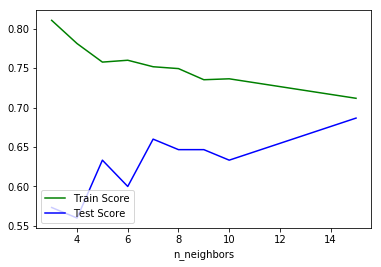

In [18]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('linear')
plt.legend(loc = 3)
plt.xlabel(r'n_neighbors')

In [19]:
report_table = [['KNN', 'K = 5', grid_knn.score(X_train_clean, y_train_clean), 
                 grid_knn.score(X_test_clean, y_test_clean), roc_auc_score(y_true=y_train_clean, y_score=y_knn_train_predict),
                 roc_auc_score(y_true=y_test_clean, y_score=y_knn_predict) ]]

In [20]:
report_table

[['KNN',
  'K = 5',
  0.8022446229456217,
  0.5052257525083612,
  0.6622628547270517,
  0.5052257525083612]]

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100] }
grid_log_reg = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
grid_log_reg.fit(X_train_clean, y_train_clean)

C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\s

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
print("Logistic Regression Training Score: ", grid_log_reg.score(X_train_clean, y_train_clean))

Logistic Regression Training Score:  0.7870588235294118


In [23]:
print("Logistic Regression Testing Score: ", grid_log_reg.score(X_test_clean, y_test_clean))

Logistic Regression Testing Score:  0.7733333333333333


In [24]:
print("Best Parameters for Logistic Regression: ", grid_log_reg.best_params_)

Best Parameters for Logistic Regression:  {'C': 100}


In [25]:
print("Logistic Regression Mean Test Scores: ", grid_log_reg.cv_results_['mean_test_score'])

Logistic Regression Mean Test Scores:  [0.70941176 0.71764706 0.74       0.74470588 0.74470588 0.74588235]


In [26]:
y_log_predict_train = grid_log_reg.predict(X_train_clean)
y_log_predict = grid_log_reg.predict(X_test_clean)

In [27]:
train_score_list = []
test_score_list = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in x_range: 
    model = LogisticRegression(C=alpha)
    model.fit(X_train_clean,y_train_clean)
    train_score_list.append(model.score(X_train_clean,y_train_clean))
    test_score_list.append(model.score(X_test_clean, y_test_clean))

C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarn

Text(0.5, 0, 'C')

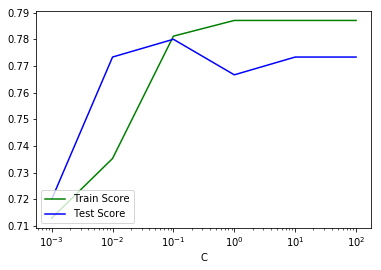

In [28]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('C')

In [29]:
report_table = report_table + [['Logistic Regression', 'C = 10', grid_log_reg.score(X_train_clean, y_train_clean),
                                grid_log_reg.score(X_test_clean, y_test_clean), roc_auc_score(y_score=y_log_predict_train, y_true=y_train_clean),
                                roc_auc_score(y_score=y_log_predict, y_true=y_test_clean)]]

### Linear SVM 

In [30]:
from sklearn.svm import LinearSVC

svc_lin = LinearSVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_svc_lin = GridSearchCV(svc_lin, param_grid, cv = 5, scoring='roc_auc', return_train_score=True)
grid_svc_lin.fit(X_train_clean, y_train_clean)

C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear f

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [31]:
print("Linear SVC Training Score: ", grid_svc_lin.score(X_train_clean, y_train_clean))

Linear SVC Training Score:  0.5246393278021455


In [32]:
print("Linear SVC Testing Score: ",grid_svc_lin.score(X_test_clean, y_test_clean))

Linear SVC Testing Score:  0.534489966555184


In [33]:
print("Best Parameters for Linear SVC: ", grid_svc_lin.best_params_)

Best Parameters for Linear SVC:  {'C': 0.01}


In [34]:
print("Linear SVC Mean Test Scores: ", grid_svc_lin.cv_results_['mean_test_score'])

Linear SVC Mean Test Scores:  [0.59254623 0.6022837  0.59977794 0.59042827 0.59964422 0.57332424]


In [35]:
y_svc_lin_predict_train = grid_svc_lin.predict(X_train_clean)
y_svc_lin_predict = grid_svc_lin.predict(X_test_clean)

In [36]:
train_score_list = []
test_score_list = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in x_range: 
    model = LinearSVC(C=alpha)
    model.fit(X_train_clean,y_train_clean)
    train_score_list.append(model.score(X_train_clean,y_train_clean))
    test_score_list.append(model.score(X_test_clean, y_test_clean))

C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear f

Text(0.5, 0, 'C')

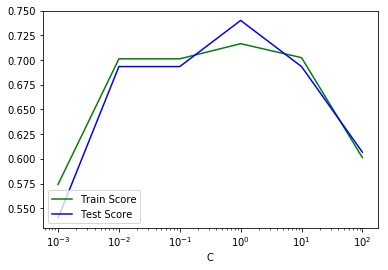

In [37]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('C')

In [38]:
report_table = report_table + [['LinearSVC', 'C = 0.1', grid_svc_lin.score(X_train_clean, y_train_clean),
                                grid_svc_lin.score(X_test_clean, y_test_clean), roc_auc_score(y_score=y_svc_lin_predict_train, y_true=y_train_clean),
                                roc_auc_score(y_score=y_svc_lin_predict, y_true=y_test_clean)]]

In [39]:
report_table

[['KNN',
  'K = 5',
  0.8022446229456217,
  0.5052257525083612,
  0.6622628547270517,
  0.5052257525083612],
 ['Logistic Regression',
  'C = 10',
  0.7870588235294118,
  0.7733333333333333,
  0.7171233419648047,
  0.6849916387959866],
 ['LinearSVC', 'C = 0.1', 0.5246393278021455, 0.534489966555184, 0.5, 0.5]]

###  Kernelized SVM

In [40]:
from sklearn.svm import SVC
kernel_linear = SVC(kernel='linear')
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_kernel_linear = GridSearchCV(kernel_linear, param_grid, cv = 5, scoring='roc_auc',return_train_score=True, n_jobs=-1)
grid_kernel_linear.fit(X_train_clean, y_train_clean)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [41]:
print("Linear Kernalized SVM Training Score: ", grid_kernel_linear.score(X_train_clean, y_train_clean))

Linear Kernalized SVM Training Score:  0.8309398615441526


In [42]:
print("Linear Kernalized SVM Testing Score: ", grid_kernel_linear.score(X_test_clean, y_test_clean))

Linear Kernalized SVM Testing Score:  0.7782190635451505


In [43]:
print("Best Parameters for Linear Kernalized SVM: ", grid_kernel_linear.best_params_)

Best Parameters for Linear Kernalized SVM:  {'C': 0.1}


In [44]:
print("Linear Kernalized SVM Mean Test Scores: ", grid_kernel_linear.cv_results_['mean_test_score'])

Linear Kernalized SVM Mean Test Scores:  [0.76133773 0.76384414 0.78121035 0.76182364 0.76557792 0.76494072]


In [45]:
y_ker_lin_predict_train = grid_kernel_linear.predict(X_train_clean)
y_ker_lin_predict = grid_kernel_linear.predict(X_test_clean)

In [46]:
# from sklearn.svm import SVC
# train_score_list = []
# test_score_list = []
# x_range = [0.001, 0.01, 0.1, 1, 10, 100]

# for alpha in x_range: 
#     model = SVC(kernel='linear', C = alpha, verbose=True)
#     model.fit(X_train_clean,y_train_clean)
#     train_score_list.append(model.score(X_train_clean,y_train_clean))
#     test_score_list.append(model.score(X_test_clean, y_test_clean))

In [47]:
# plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
# plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
# plt.xscale('log')
# plt.legend(loc = 3)
# plt.xlabel('C')

In [48]:
report_table = report_table + [['Linear Kernelized SVM', 'C = 1', grid_kernel_linear.score(X_train_clean, y_train_clean),
                                grid_kernel_linear.score(X_test_clean, y_test_clean), roc_auc_score(y_score=y_ker_lin_predict_train, y_true=y_train_clean),
                                roc_auc_score(y_score=y_ker_lin_predict, y_true=y_test_clean)]]

In [49]:
kernel_rbf = SVC(kernel='rbf', gamma=0.7)

param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_kernel_rbf = GridSearchCV(kernel_rbf, param_grid, cv = 5, scoring='roc_auc',return_train_score=True, n_jobs=-1)
grid_kernel_rbf.fit(X_train_clean, y_train_clean)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=0.7,
                           kernel='rbf', max_iter=-1, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [50]:
print("Rbf Kernalized SVM Training Score: ", grid_kernel_rbf.score(X_train_clean, y_train_clean))

Rbf Kernalized SVM Training Score:  1.0


In [51]:
print("Rbf Kernalized SVM Testing Score: ", grid_kernel_rbf.score(X_test_clean, y_test_clean))

Rbf Kernalized SVM Testing Score:  0.4776337792642141


In [52]:
print("Best Parameters for Rbf Kernalized SVM: ", grid_kernel_rbf.best_params_)

Best Parameters for Rbf Kernalized SVM:  {'C': 0.001}


In [53]:
print("Rbf Kernalized SVM Mean Test Scores: ", grid_kernel_rbf.cv_results_['mean_test_score'])

Rbf Kernalized SVM Mean Test Scores:  [0.49892626 0.49559649 0.49382185 0.49884109 0.49660721 0.49660721]


In [54]:
y_ker_rbf_predict_train = grid_kernel_rbf.predict(X_train_clean)
y_ker_rbf_predict = grid_kernel_rbf.predict(X_test_clean)

In [55]:
#train_score_list = []
#test_score_list = []
#x_range = [0.001, 0.01, 0.1, 1, 10, 100]

#for alpha in x_range: 
#    model = SVC(kernel='rbf', C = alpha, gamma = 0.7)
#    model.fit(X_train_clean,y_train_clean)
#    train_score_list.append(model.score(X_train_clean,y_train_clean))
#    test_score_list.append(model.score(X_test_clean, y_test_clean))

In [56]:
#plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
#plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
#plt.xscale('log')
#plt.legend(loc = 3)
#plt.xlabel('C')

In [57]:
report_table = report_table + [['Rbf Kernelized SVM', 'C = 0.001', grid_kernel_rbf.score(X_train_clean, y_train_clean),
                               grid_kernel_rbf.score(X_test_clean, y_test_clean), roc_auc_score(y_score=y_ker_rbf_predict_train, y_true=y_train_clean),
                               roc_auc_score(y_score=y_ker_rbf_predict, y_true=y_test_clean)]]

In [ ]:
kernel_poly = SVC(kernel='poly', degree=3)

param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_kernel_poly = GridSearchCV(kernel_poly, param_grid, cv = 5, scoring='roc_auc',return_train_score=True, n_jobs=-1)
grid_kernel_poly.fit(X_train_clean, y_train_clean)

In [ ]:
print("Poly Kernalized SVM Training Score: ", grid_kernel_poly.score(X_train_clean, y_train_clean))

In [ ]:
print("Poly Kernalized SVM Testing Score: ", grid_kernel_poly.score(X_test_clean, y_test_clean))

In [ ]:
print("Best Parameters for Poly Kernalized SVM: ", grid_kernel_poly.best_params_)

In [ ]:
print("Poly Kernalized SVM Mean Test Scores: ", grid_kernel_poly.cv_results_['mean_test_score'])

In [ ]:
y_ker_poly_predict_train = grid_kernel_poly.predict(X_train_clean)
y_ker_poly_predict = grid_kernel_poly.predict(X_test_clean)

In [ ]:
#train_score_list = []
#test_score_list = []
#x_range = [0.001, 0.01, 0.1, 1, 10, 100]

#for alpha in x_range: 
#    model = SVC(kernel='poly', C = alpha, degree=3)
#    model.fit(X_train_clean,y_train_clean)
#    train_score_list.append(model.score(X_train_clean,y_train_clean))
#    test_score_list.append(model.score(X_test_clean, y_test_clean))

In [ ]:
#plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
#plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
#plt.xscale('log')
#plt.legend(loc = 3)
#plt.xlabel('C')

In [ ]:
report_table = report_table + [['Poly Kernelized SVM', 'C = 0.1', grid_kernel_poly.score(X_train_clean, y_train_clean),
                               grid_kernel_poly.score(X_test_clean, y_test_clean), roc_auc_score(y_score=y_ker_poly_predict_train, y_true=y_train_clean),
                              roc_auc_score(y_score=y_ker_poly_predict, y_true=y_test_clean)]]

### Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': np.arange(5, 20)}

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid,cv = 5, scoring='roc_auc', return_train_score=True)
grid_tree.fit(X_train_clean, y_train_clean)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
             pre_dispatch='2

In [60]:
print("Decision Tree Training Score: ", grid_tree.score(X_train_clean, y_train_clean))

Decision Tree Training Score:  0.8421563705543519


In [62]:
print("Decision Tree Testing Score: ", grid_tree.score(X_test_clean, y_test_clean))

Decision Tree Testing Score:  0.680497491638796


In [63]:
print("Best Parameters for Decision Tree: ", grid_tree.best_params_)

Best Parameters for Decision Tree:  {'max_depth': 5}


In [64]:
print("Decision Tree Mean Test Scores: ", grid_tree.cv_results_['mean_test_score'])

Decision Tree Mean Test Scores:  [0.67356069 0.66829005 0.65896586 0.64191045 0.65044583 0.64679829
 0.62918091 0.63678206 0.61371121 0.60254324 0.60293501 0.59173328
 0.60609013 0.59431144 0.59648721]


In [65]:
y_tree_predict_train = grid_tree.predict(X_train_clean)
y_tree_predict = grid_tree.predict(X_test_clean)

In [66]:
train_score_list = []
test_score_list = []
x_range = np.arange(5, 20)

for alpha in x_range: 
    model = DecisionTreeClassifier(max_depth=alpha)
    model.fit(X_train_clean,y_train_clean)
    train_score_list.append(model.score(X_train_clean,y_train_clean))
    test_score_list.append(model.score(X_test_clean, y_test_clean))

Text(0.5, 0, 'Max Depth')

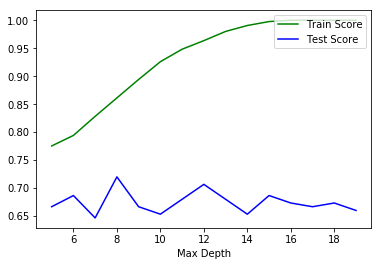

In [67]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('linear')
plt.legend(loc = 1)
plt.xlabel('Max Depth')

In [68]:
report_table = report_table + [['Decision Tree', 'd = 5', grid_tree.score(X_train_clean, y_train_clean),
                                grid_tree.score(X_test_clean, y_test_clean), roc_auc_score(y_score=y_tree_predict_train, y_true=y_train_clean),
                                roc_auc_score(y_score=y_tree_predict, y_true=y_test_clean)]]

In [69]:
main_report = pd.DataFrame(report_table,columns = ['Model Name', 'Model Parameter', 'Training Accuracy',
                                              'Testing Accuracy', 'Training AUC score', 'Testing AUC score'])

In [70]:
main_report.index = main_report['Model Name']

In [71]:
main_report.head(10)

,Model Name,Model Parameter,Training Accuracy,Testing Accuracy,Training AUC score,Testing AUC score
Model Name,,,,,,
KNN,KNN,K = 5,0.802245,0.505226,0.662263,0.505226
Logistic Regression,Logistic Regression,C = 100,0.787059,0.773333,0.717123,0.684992
LinearSVC,LinearSVC,C = 0.01,0.524639,0.534490,0.500000,0.500000
Linear Kernelized SVM,Linear Kernelized SVM,C = 0.1,0.830940,0.778219,0.709249,0.669314
Rbf Kernelized SVM,Rbf Kernelized SVM,C = 0.001,1.000000,0.477634,0.500000,0.500000
Decision Tree,Decision Tree,d = 5,0.842156,0.680497,0.725678,0.600753


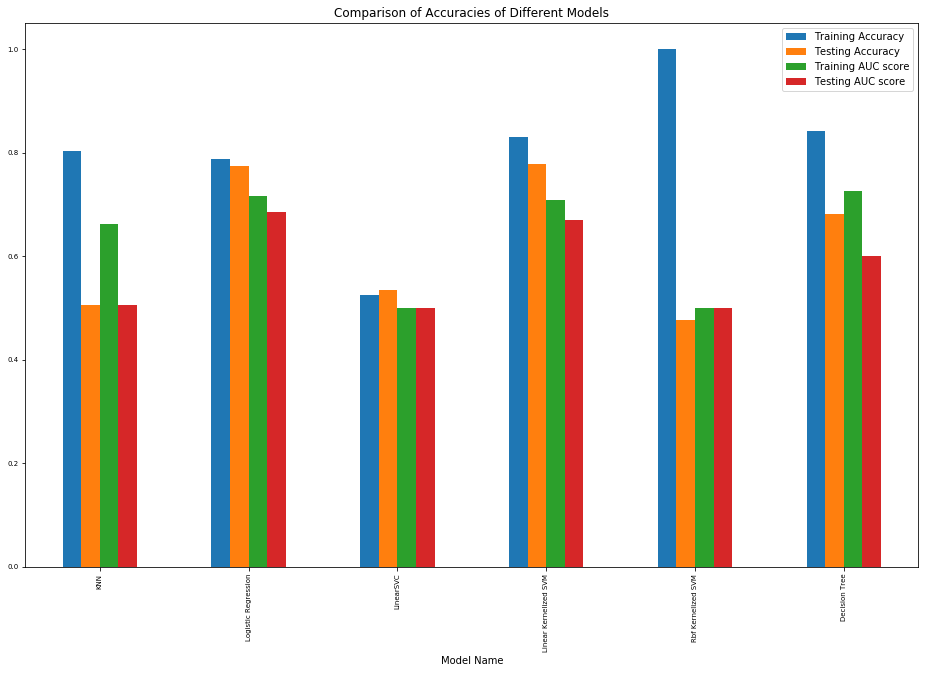

In [72]:
graph = main_report[['Training Accuracy','Testing Accuracy','Training AUC score', 'Testing AUC score']].plot(kind='bar',
            title = "Comparison of Accuracies of Different Models", figsize=(16, 10), fontsize = 7)
plt.show()

**Logistic Regression and Linear Kernelized SVM** seems to be the best fit model with not overfitting the data and at the same time not underfitting the data.

### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=100)
model.fit(X_train_clean,y_train_clean)

C:\Users\deepe\Anaconda3\envs\bhratesh_ml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
print("Logistic Regression Training Score:", model.score(X_train_clean, y_train_clean))
print("Logistic Regression Testing Score:", model.score(X_test_clean, y_test_clean))

Logistic Regression Training Score: 0.7870588235294118
Logistic Regression Testing Score: 0.7733333333333333


In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt

y_predicted = model.predict(X_test_clean)

rmse = sqrt(mean_squared_error(y_test_clean, y_predicted))

print("Logistic Regression Root Mean Squared Error (RMSE):", rmse)

Logistic Regression Root Mean Squared Error (RMSE): 0.4760952285695233


In [24]:
print("Predicted value for 10th testing row: ", y_predicted[9])
print("Original value for 10th testing row: ", y_test_clean.values[9])
print("")
print("Predicted value for 100th testing row: ", y_predicted[99])
print("Original value for 100th testing row: ", y_test_clean.values[99])

Predicted value for 10th testing row:  1
Original value for 10th testing row:  1

Predicted value for 100th testing row:  1
Original value for 100th testing row:  1


**RMSE of 0.47 was achieved. 
Training and testing score of around 0.78 and 0.77 was calculated using Logistic Regression for regression.** 

### Linear Kernelized SVM

In [15]:
kernel_linear = SVC(kernel='linear', C = 0.1)
kernel_linear.fit(X_train_clean, y_train_clean)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
print("Linear Kernelized SVM Regression Training Score:", kernel_linear.score(X_train_clean, y_train_clean))
print("Linear Kernelized SVM Regression Testing Score:", kernel_linear.score(X_test_clean, y_test_clean))

Linear Kernelized SVM Regression Training Score: 0.7823529411764706
Linear Kernelized SVM Regression Testing Score: 0.76


In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt

y_predicted = kernel_linear.predict(X_test_clean)

rmse = sqrt(mean_squared_error(y_test_clean, y_predicted))

print("Linear Kernelized SVM Regression Root Mean Squared Error (RMSE):", rmse)

Linear Kernelized SVM Regression Root Mean Squared Error (RMSE): 0.4898979485566356


In [26]:
print("Predicted value for 10th testing row: ", y_predicted[9])
print("Original value for 10th testing row: ", y_test_clean.values[9])
print("")
print("Predicted value for 100th testing row: ", y_predicted[99])
print("Original value for 100th testing row: ", y_test_clean.values[99])

Predicted value for 10th testing row:  1
Original value for 10th testing row:  1

Predicted value for 100th testing row:  1
Original value for 100th testing row:  1


**According to this model, RMSE of 0.49 was achieved.
While the train and test scores were calculated using Linear Kernelized SVM Regression as 0.78 and 0.76 respectively.**